In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

import numpy as np
import torch
import torch as tr
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision as tv
from torchvision.transforms import v2
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

%matplotlib inline

In [25]:
from impl.arch import ConvNetwork

In [4]:
import impl.retinal_dataset as rd

transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Resize((224, 224)),
])

train_dataset = rd.RetinalDataset(transform=transform, split="train", num_rows=-1)
test_dataset = rd.RetinalDataset(transform=transform, split="test", num_rows=-1)

100%|█████████████████████████████| 640/640 [02:36<00:00,  4.10it/s]


In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=64)

In [26]:
model = ConvNetwork()

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.5)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
model.train()
for i in range(4):
    epoch_loss = 0
    # b = 0

    for images, labels in train_dataloader:
        model.train()

        optimizer.zero_grad()
        logits = model(images)
        loss = loss_fn(logits, labels)
        # if b % 4 == 0:
        #     print(f"{b+1}: {loss/len(images)}")

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        # b += 1

    print(f"==== Epoch {i+1}: train_loss={epoch_loss/len(train_dataset):.10f}")

print("Done")

In [ ]:
# torch.save({'model_state': model.state_dict()},'checkpoints/model1_004.chk')

In [27]:
# checkpoint = torch.load('checkpoints/model1_003.chk')
# model.load_state_dict(checkpoint['model_state'])

/tmp/ipykernel_10856/2431252852.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoints/model1_003.chk')


<All keys matched successfully>

In [12]:
@torch.no_grad()
def calculate_loss(dataset):
    model.eval()

    total_loss = 0
    for images, labels in dataloader:
        logits = model(images)
        loss = loss_fn(logits, labels)
        total_loss += loss.item()

    total_loss /= len(dataset)
    return total_loss

In [ ]:
train_loss = calculate_loss(train_dataset)
print(f"{train_loss=}")

test_loss = calculate_loss(test_dataset)
print(f"{test_loss=}")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000004].


Text(0.5, 1.0, 'y=1, pred=1')

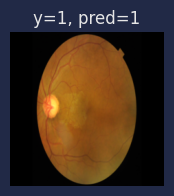

In [32]:
model.eval()

plt.figure(figsize=(2,2))

index = 16
image, label = test_dataset[index]
logits = model(image)
pred_label = logits.argmax(dim=0).item()

plt.imshow(image.movedim(0,-1))
plt.axis('off')
plt.title(f"y={label}, pred={pred_label}")